In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("../cleaning/cleaned_data.csv")
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years,Item_Type_New
0,9.30,0,0.016047,4,249.8092,1,0,1,3735.1380,23,1
1,5.92,2,0.019278,14,48.2692,1,2,2,443.4228,13,0
2,17.50,0,0.016760,10,141.6180,1,0,1,2097.2700,23,1
3,19.20,2,0.015274,6,182.0950,2,2,0,732.3800,24,1
4,8.93,1,0.008082,9,53.8614,0,2,1,994.7052,35,2


In [41]:
# trying not to use iTem_Type_New To see improvement

In [3]:
Y= df['Item_Outlet_Sales']
X= df.drop(columns=['Item_Outlet_Sales','Item_Type_New'],axis=1)

In [4]:
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Years
0,9.30,0,0.016047,4,249.8092,1,0,1,23
1,5.92,2,0.019278,14,48.2692,1,2,2,13
2,17.50,0,0.016760,10,141.6180,1,0,1,23
3,19.20,2,0.015274,6,182.0950,2,2,0,24
4,8.93,1,0.008082,9,53.8614,0,2,1,35


### spliting the data

In [5]:
### train test split
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=.25,random_state= 42)


In [6]:
print(x_train.shape, y_train.shape)
print(x_test.shape,y_test.shape)

(6392, 9) (6392,)
(2131, 9) (2131,)


### scaling

In [7]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
x_train= scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

 ## Model Training

### 1. Linear regression

In [8]:
from sklearn.linear_model import LinearRegression
lr_model= LinearRegression()
lr_model.fit(x_train,y_train)
lr_score= lr_model.score(x_test,y_test)
lr_score

0.5036244908255898

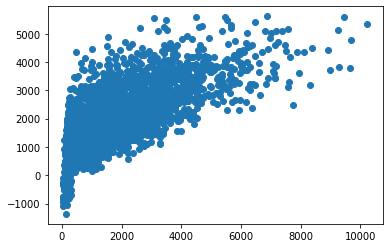

In [9]:
y_pred= lr_model.predict(x_test)
plt.scatter(y_test,y_pred)
plt.show()

In [10]:
from sklearn.metrics import mean_squared_error
lr_RME= np.sqrt(mean_squared_error(y_test,y_pred))
print(lr_RME)

1170.2515780957792


### 2. lasso


In [11]:
from sklearn.linear_model import Lasso
lasso_model= LinearRegression()
lasso_model.fit(x_train,y_train)
lasso_score= lasso_model.score(x_test,y_test)
lasso_score


0.5036244908255898

rmse 1170.2515780957792


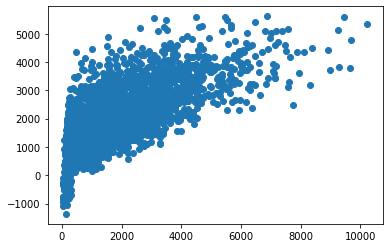

In [12]:
y_pred= lr_model.predict(x_test)
lasso_RMSE= np.sqrt(mean_squared_error(y_test,y_pred))
print("rmse",lasso_RMSE)
plt.scatter(y_test,y_pred)
plt.show()

### 3. Decision tree

In [13]:
from sklearn.tree import DecisionTreeRegressor
tree_model= DecisionTreeRegressor()
tree_model.fit(x_train,y_train)
score= tree_model.score(x_test,y_test)
print(score)

0.1862287054516435


In [14]:
score= tree_model.score(x_train,y_train)
print(score)

1.0


rmse 1498.3913104152516


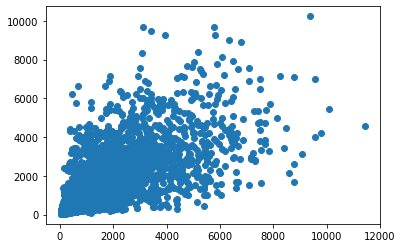

In [15]:
y_pred= tree_model.predict(x_test)
tree_RMSE= np.sqrt(mean_squared_error(y_test,y_pred))
print("rmse",tree_RMSE)
plt.scatter(y_pred,y_test)
plt.show()

### 4. Random Forest

score 0.5064169945106072
rmse 1166.9551412940355


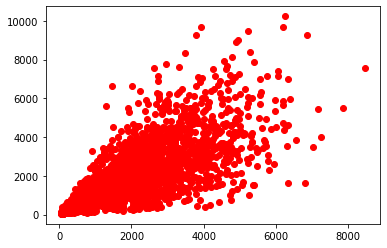

In [16]:
from sklearn.ensemble import RandomForestRegressor

forest_model= RandomForestRegressor(n_estimators=10)
forest_model.fit(x_train,y_train)
score= forest_model.score(x_test,y_test)
print("score", score)
y_pred= forest_model.predict(x_test)
rmse= np.sqrt(mean_squared_error(y_test,y_pred))
print("rmse", rmse)
plt.scatter(y_pred,y_test,c='red')
plt.show()


### 5. xgb regression

C:\Users\Adesh Kumar\anaconda3\envs\bigmart\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


score 0.5342033872380517
rmse 1133.6323369362249


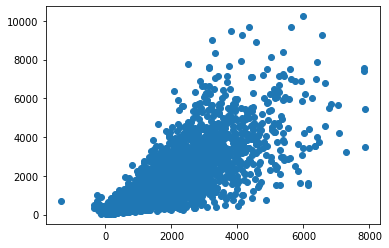

In [17]:
from xgboost import XGBRegressor

xg_model= XGBRegressor()
xg_model.fit(x_train,y_train)
score= xg_model.score(x_test,y_test)
print("score", score)
y_pred= xg_model.predict(x_test)
rmse= np.sqrt(mean_squared_error(y_test,y_pred))
print("rmse", rmse)
plt.scatter(y_pred,y_test)
plt.show()



In [18]:
### best model we get till now is Random forest


In [19]:
rf = RandomForestRegressor()


In [20]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [21]:
y_pred= rf.predict(x_test)
rmse= np.sqrt(mean_squared_error(y_test,y_pred))
print(rmse)

1102.8927486553398


In [22]:
result= pd.DataFrame({"actual":y_test,"Pred":y_pred})
result.head()

,actual,Pred
7503,1743.0644,666.732120
2957,356.8688,914.982308
7031,377.5086,747.373816
1084,5778.4782,5425.890494
856,2356.9320,2517.016952


### hyperparameter tunig with RandomForest Regression

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

# define models and parameters
model = RandomForestRegressor(random_state=42)
n_estimators =[50,100,1000] 
# min_samples_leaf=[1, 2, 4,6,8]
#max_features=["auto", "sqrt", "log2"]
#min_samples_split=[2, 5, 10,14]

# define grid search
grid = dict(n_estimators=n_estimators,
           
           )

cv = KFold(n_splits=3,shuffle=True)

grid_search_forest = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, 
                           scoring='r2',error_score=0,verbose=2,cv=cv)

grid_search_forest.fit(x_train, y_train)

# summarize results
print(f"Best: {grid_search_forest.best_score_:.3f} using {grid_search_forest.best_params_}")
means = grid_search_forest.cv_results_['mean_test_score']
stds = grid_search_forest.cv_results_['std_test_score']
params = grid_search_forest.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best: 0.554 using {'n_estimators': 1000}
0.548 (0.005) with: {'n_estimators': 50}
0.550 (0.005) with: {'n_estimators': 100}
0.554 (0.006) with: {'n_estimators': 1000}


In [24]:
grid_search_forest.best_params_

{'n_estimators': 1000}

### SVR

In [25]:
from sklearn.svm import SVR
svr= SVR()
svr.fit(x_train,y_train)

SVR()

In [26]:
svr.score(x_test,y_test)

0.07482620260904294

1597.6650131599822


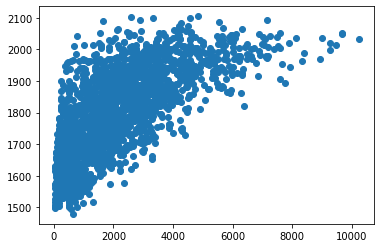

In [27]:
y_pred= svr.predict(x_test)
rmse= np.sqrt(mean_squared_error(y_test,y_pred))
print(rmse)
plt.scatter(y_test,y_pred)
plt.show()

### ADa grad

In [28]:
from sklearn.ensemble import AdaBoostRegressor

ada_reg= AdaBoostRegressor(n_estimators=10,learning_rate=.3)
ada_reg.fit(x_train,y_train)
ada_reg.score(x_test,y_test)

0.5678118265022081

In [29]:
y_pred= ada_reg.predict(x_test)
rmse= np.sqrt(mean_squared_error(y_test,y_pred))
print(rmse)

1091.9694843442512


In [30]:

model_ada= AdaBoostRegressor()

#param
n_estimators= [5,10,15,20,50]
learning_rate=[0.1,.2,.3,.7,1,.5]
grid = dict(n_estimators=n_estimators,
            learning_rate= learning_rate
           
           )

cv = KFold(n_splits=5,shuffle=True)

grid_search_ada = GridSearchCV(estimator=model_ada, param_grid=grid, n_jobs=-1, 
                           scoring='r2',error_score=0,verbose=2,cv=cv)

grid_search_ada.fit(x_train, y_train)

# summarize results
print(f"Best: {grid_search_ada.best_score_:.3f} using {grid_search_ada.best_params_}")
means = grid_search_ada.cv_results_['mean_test_score']
stds = grid_search_ada.cv_results_['std_test_score']
params = grid_search_ada.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best: 0.567 using {'learning_rate': 0.1, 'n_estimators': 50}
0.526 (0.036) with: {'learning_rate': 0.1, 'n_estimators': 5}
0.532 (0.036) with: {'learning_rate': 0.1, 'n_estimators': 10}
0.544 (0.036) with: {'learning_rate': 0.1, 'n_estimators': 15}
0.550 (0.041) with: {'learning_rate': 0.1, 'n_estimators': 20}
0.567 (0.035) with: {'learning_rate': 0.1, 'n_estimators': 50}
0.535 (0.037) with: {'learning_rate': 0.2, 'n_estimators': 5}
0.546 (0.041) with: {'learning_rate': 0.2, 'n_estimators': 10}
0.562 (0.035) with: {'learning_rate': 0.2, 'n_estimators': 15}
0.563 (0.034) with: {'learning_rate': 0.2, 'n_estimators': 20}
0.553 (0.036) with: {'learning_rate': 0.2, 'n_estimators': 50}
0.540 (0.042) with: {'learning_rate': 0.3, 'n_estimators': 5}
0.561 (0.041) with: {'learning_rate': 0.3, 'n_estimators': 10}
0.565 (0.036) with: {'learning_rate': 0.3, 'n_estimators': 15}
0.561 (0.038) with: {'learning_rate': 0.3, 'n_estimators': 20

 ### best model so far is ada_reg with learning rate 0.3, n_estimator = 10

rmse : 1091.9694843442512
MSE : 1192397.35473905


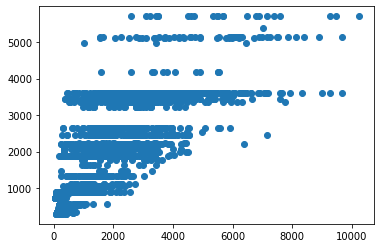

In [31]:
y_pred = ada_reg.predict(x_test)
rmse= np.sqrt(mean_squared_error(y_test,y_pred))
print("rmse :",rmse)
print("MSE :",mean_squared_error(y_test,y_pred) )

plt.scatter(y_test,y_pred)
plt.show()


In [32]:
from sklearn.model_selection import cross_val_score, KFold
cv = KFold(n_splits=5, random_state=1, shuffle=True)
scores = cross_val_score(ada_reg,x_train, y_train, scoring='r2', cv=cv, n_jobs=-1)
print(np.mean(scores))

0.561536531639118


In [33]:
ada_reg.score(x_test,y_test)

0.5678118265022081

In [34]:
result= pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
result.head(7)

,Actual,Predicted
7503,1743.0644,1043.407349
2957,356.8688,903.305731
7031,377.5086,903.305731
1084,5778.4782,5102.001087
856,2356.9320,3434.030409
4304,865.5400,903.305731
2132,4613.9940,5132.858504


### saving model and scaler

In [42]:
import pickle
#model
filename= "model.sav"
pickle.dump(ada_reg,open(filename,"wb"))

In [43]:
#scaler
filename = "scaler.sav"
pickle.dump(scaler,open(filename,"wb"))

In [44]:
ld_model= pickle.load(open("model.sav","rb"))
ld_model.score(x_test,y_test)

0.5678118265022081